<a href="https://colab.research.google.com/github/NanThanThanSoe/OfflineHandwrittenRecognition/blob/master/MLHW3Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 2 [3 points]

Develop deep learning models using convolution neural network to classify all 120 fruits of the Fruit-Images Dataset published by Horea94. You should develop at least one models and compare its performance with the paper [1]. Note: You must not use transfer learning in this question.
- Datasource: https://github.com/Horea94/Fruit-Images-Dataset
- Paper: [1] H. Mureşan and M. Oltean, “Fruit recognition from images using deep learning,” Acta Universitatis Sapientiae, Informatica, vol. 10, no. 1, pp. 26–42, Aug. 2018, doi: 10.2478/ausi-2018-0002.

In [1]:
pip install -U keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [2]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

fatal: destination path 'Fruit-Images-Dataset' already exists and is not an empty directory.


In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import glob

import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [4]:
print(os.listdir("/content/Fruit-Images-Dataset"))

['.git', 'src', 'Training', 'Test', 'papers', 'test-multiple_fruits', 'LICENSE', 'readme.md']


In [0]:
# training data
train_images = []       
train_labels = []
shape = (28, 28)  
train_path = '/content/Fruit-Images-Dataset/Training/*'

for fruit_dir_path in glob.glob("/content/Fruit-Images-Dataset/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, shape)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        train_images.append(image)
        train_labels.append(fruit_label)
train_images = np.array(train_images)
train_labels = pd.get_dummies(train_labels).values

In [0]:
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels)

In [0]:
# testing data
test_images = []       
test_labels = []
shape = (28, 28)  
train_path = '/content/Fruit-Images-Dataset/Test/*'

for fruit_dir_path in glob.glob("/content/Fruit-Images-Dataset/Test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, shape)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        test_images.append(image)
        test_labels.append(fruit_label)
test_images = np.array(test_images)

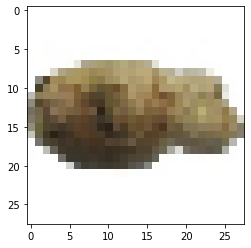

In [8]:
plt.imshow(train_images[0])

In [9]:
print(train_labels.shape, train_images.shape)

(61488, 120) (61488, 28, 28, 3)


In [10]:
# Creting first CNN model
model= Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28,28,3,)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dropout(rate=0.5) )
model.add(Dense(150, activation='relu'))
model.add(Dense(120,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               2764950   
_________________________________________________________________
dense_2 (Dense)              (None, 120)               18120     
Total params: 2,788,158
Trainable params: 2,788,158
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [12]:
history = model.fit(x_train, y_train, batch_size=20, epochs=5, verbose=1, validation_data=(x_val, y_val))

Train on 46116 samples, validate on 15372 samples
Epoch 1/5
46116/46116 [==============================] - 160s 3ms/step - loss: 1.5477 - acc: 0.7525 - val_loss: 0.0632 - val_acc: 0.9842
Epoch 2/5
46116/46116 [==============================] - 160s 3ms/step - loss: 0.2291 - acc: 0.9480 - val_loss: 0.1728 - val_acc: 0.9564
Epoch 3/5
46116/46116 [==============================] - 161s 3ms/step - loss: 0.1884 - acc: 0.9626 - val_loss: 0.0395 - val_acc: 0.9912
Epoch 4/5
46116/46116 [==============================] - 158s 3ms/step - loss: 0.1925 - acc: 0.9687 - val_loss: 0.0510 - val_acc: 0.9894
Epoch 5/5
46116/46116 [==============================] - 158s 3ms/step - loss: 0.1975 - acc: 0.9742 - val_loss: 0.0725 - val_acc: 0.9875


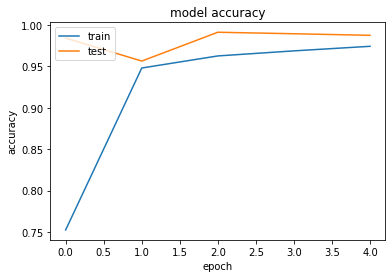

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

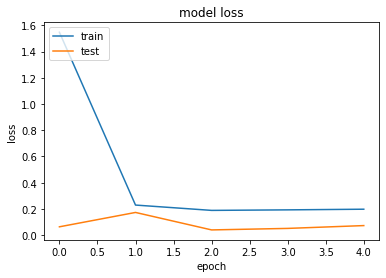

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07251160895004696
Test accuracy: 0.9875097870826721


In [16]:
# Creting second CNN model
model_cnn= Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,3,)))
model_cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dropout(rate=0.5) )
model_cnn.add(Dense(120,activation = 'softmax'))

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)              

In [21]:
model_cnn.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')
result = model_cnn.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_val, y_val))

Train on 46116 samples, validate on 15372 samples
Epoch 1/5
46116/46116 [==============================] - 129s 3ms/step - loss: 0.3113 - acc: 0.9041 - val_loss: 0.0464 - val_acc: 0.9877
Epoch 2/5
46116/46116 [==============================] - 128s 3ms/step - loss: 0.2394 - acc: 0.9268 - val_loss: 0.0092 - val_acc: 0.9981
Epoch 3/5
46116/46116 [==============================] - 128s 3ms/step - loss: 0.1750 - acc: 0.9458 - val_loss: 0.0144 - val_acc: 0.9951
Epoch 4/5
46116/46116 [==============================] - 128s 3ms/step - loss: 0.1727 - acc: 0.9487 - val_loss: 0.0055 - val_acc: 0.9992
Epoch 5/5
46116/46116 [==============================] - 128s 3ms/step - loss: 0.1191 - acc: 0.9642 - val_loss: 0.0049 - val_acc: 0.9990


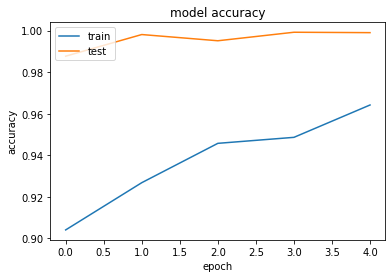

In [22]:
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

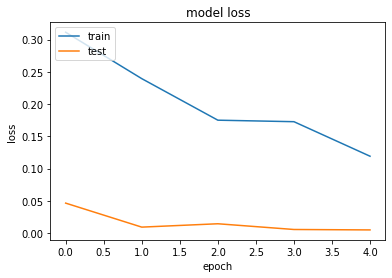

In [23]:
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
score_result = model_cnn.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score_result[0])
print('Test accuracy:', score_result[1])

Test loss: 0.004887029666208158
Test accuracy: 0.9990242123603821
